In [1]:
# import dependencies
%matplotlib notebook
from random import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

In [2]:
# read weather data csv 
ncdc_file = pd.read_csv("Data/Weather_Data_NCDC.csv")
ncdc_file.head()

,Location ID,Location,Date (Year Month),Value in F,Rank,1901-2000 Mean in F,Anomaly (1901-2000 base period)
0,100,Alabama,189501,43.1,40,45.1,-2.0
1,100,Alabama,189502,37.4,1,48.0,-10.6
2,100,Alabama,189503,54.5,55,55.1,-0.6
3,100,Alabama,189504,63.4,73,62.8,0.6
4,100,Alabama,189505,69.5,37,70.7,-1.2


In [3]:
# check info of weather data csv
ncdc_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71808 entries, 0 to 71807
Data columns (total 7 columns):
Location ID                        71808 non-null int64
Location                           71808 non-null object
Date (Year Month)                  71808 non-null int64
Value in F                         71808 non-null float64
Rank                               71808 non-null int64
1901-2000 Mean in F                71808 non-null float64
Anomaly (1901-2000 base period)    71808 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.8+ MB


In [4]:
# build dataframe of only 2010 
ncdc_2010 = ncdc_file[(ncdc_file['Date (Year Month)'] >=201001) & (ncdc_file['Date (Year Month)'] <=201012)]
ncdc_2010

,Location ID,Location,Date (Year Month),Value in F,Rank,1901-2000 Mean in F,Anomaly (1901-2000 base period)
1380,100,Alabama,201001,40.0,15,45.1,-5.1
1381,100,Alabama,201002,40.6,7,48.0,-7.4
1382,100,Alabama,201003,51.2,17,55.1,-3.9
1383,100,Alabama,201004,64.2,90,62.8,1.4
1384,100,Alabama,201005,73.3,109,70.7,2.6
1385,100,Alabama,201006,80.9,120,77.5,3.4
1386,100,Alabama,201007,82.6,123,79.9,2.7
1387,100,Alabama,201008,83.0,123,79.3,3.7
1388,100,Alabama,201009,76.9,100,74.7,2.2
1389,100,Alabama,201010,64.3,71,63.9,0.4


In [5]:
ncdc_2010_df = ncdc_2010[["Location", "Value in F"]]
ncdc_2010_df

,Location,Value in F
1380,Alabama,40.0
1381,Alabama,40.6
1382,Alabama,51.2
1383,Alabama,64.2
1384,Alabama,73.3
1385,Alabama,80.9
1386,Alabama,82.6
1387,Alabama,83.0
1388,Alabama,76.9
1389,Alabama,64.3


In [21]:
ncdc_mean = pd.DataFrame(ncdc_2010_df.groupby(["Location"]).mean())
ncdc_mean

,Value in F
Location,
Alabama,62.708333
Arizona,60.391667
Arkansas,61.175000
California,57.725000
Colorado,46.150000
Connecticut,51.350000
Delaware,56.675000
Florida,69.191667
Georgia,62.958333


<IPython.core.display.Javascript object>


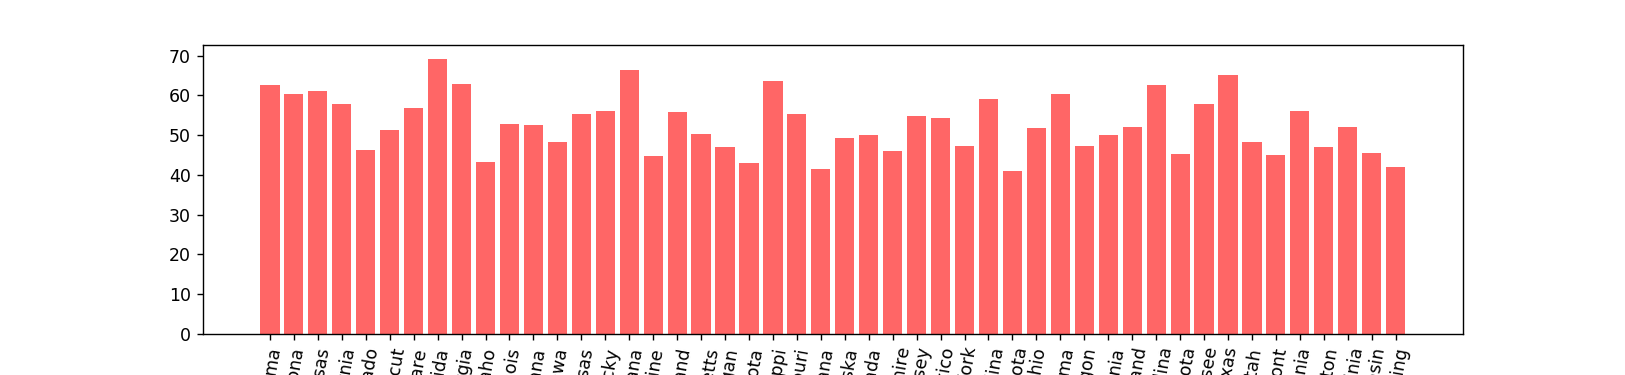

([<matplotlib.axis.XTick at 0x22b25f95668>,
 <a list of 48 Text xticklabel objects>)

In [41]:
plt.figure(figsize=(13,3))
plt.bar(x_axis, ncdc_mean["Value in F"], color='r', alpha=0.6, align="edge")
plt.xticks(tick_locations, ncdc_mean.index, rotation="80")